# Titanic Survival Analysis-I

## Problem Statement

The dataset includes various types of features that can be categorised into demographic (e.g., Age, Sex), social (e.g., SibSp, Parch), and economic indicators (e.g., Pclass, Fare, Embarked). Perform a univariate analysis of the Titanic dataset to explore the individual characteristics of passengers, such as age distribution, passenger class composition, gender ratio, and survival rates. The objective is to understand the general patterns and trends within each variable.

Key Variables for Analysis:

Dependent Variable:
- Survived (whether a passenger survived or not)

Independent Variables:
- Pclass (Passenger class: socio-economic status)
- Sex (Gender)
- Age
- SibSp (Number of siblings/spouses aboard)
- Parch (Number of parents/children aboard)
- Fare
- Embarked (Port of embarkation)

### Assessing structure of the dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df=pd.read_csv('titanic_dataset.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.head(10) #first 10 rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.tail(5) #last five rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.sample(10) #random dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q
671,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
368,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S


### Data Preprocessing

In [8]:
#Used to calculate the percentage of missing values in each column
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
#Dropping the column "Cabin"
df=df.drop("Cabin",axis=1)

In [10]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [11]:
#Age column is filled with the median of the column to avoid any biases caused by extreme values
df["Age"]=df["Age"].fillna(df["Age"].median())

In [12]:
#Checking for null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

After dropping `Cabin`, the proportion of missing values is checked again.
Missing values in the `Age` column are filled with the median of the column to avoid any biases caused by extreme values.

In [13]:
# Remaining rows with any missing values are dropped with
df=df.dropna()

In [14]:
#Verify that all missing values have been successfully removed
df.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [15]:
# View the cleaned dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
#Check the number of unique values for each feature to better understand categorical and continuous variables
df.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

In [17]:
#Confirm the new dimensions of the cleaned dataset
df.shape

(889, 11)

In [18]:
# Save the DataFrame to a CSV file
df.to_csv('titanic_dataset_cleaned.csv')

The cleaned version of the `Titanic` dataset with no missing values:

In [19]:
# List of continuous (numerical) columns in the dataset
cont_cols = ["Fare", "Age"]

# List of categorical columns in the dataset
# Survived, Pclass, Sex, SibSp, Parch, and Embarked are categorical variables
cat_cols = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

# List of identifier columns in the dataset
# These columns uniquely identify passengers but do not contribute to the analysis
id_cols = ["PassengerId", "Name", "Ticket"]

### Univariate Analysis

In [20]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [21]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [22]:
type(df['Embarked'].value_counts())

pandas.core.series.Series

Write your inferences here.

Categorical variables consist of discrete categories, such as labels or groups. Common plots for categorical data include:

#### Barplot

<Axes: xlabel='Pclass'>

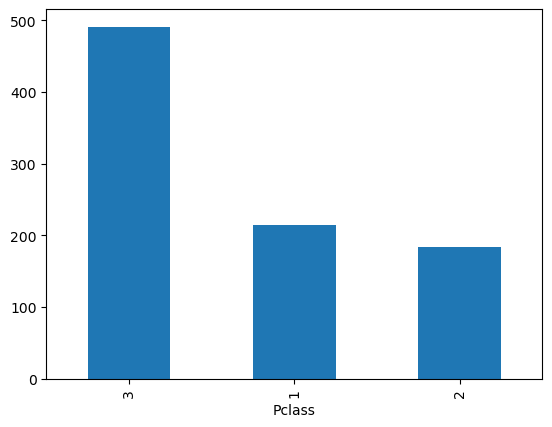

In [23]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

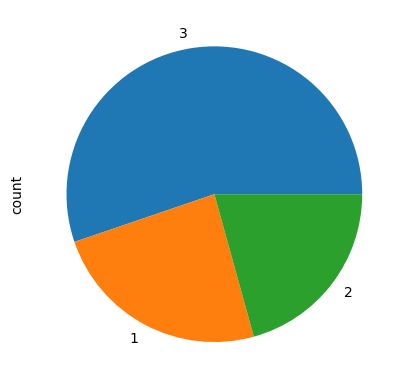

In [24]:
df['Pclass'].value_counts().plot(kind='pie')

The bar plot provides a simple and clear visual representation of how many passengers belong to each passenger class (1st, 2nd, or 3rd).

Write your inferences here.

#### Piechart

<Axes: ylabel='count'>

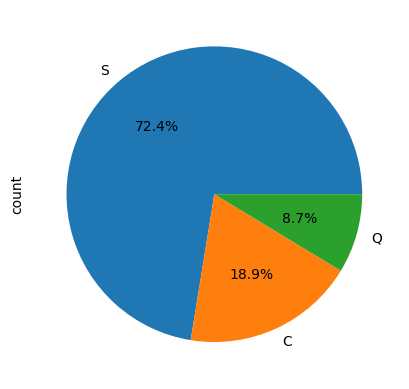

In [25]:
df['Embarked'].value_counts().plot(kind='pie', autopct='%1.1f%%') #add percentage

A pie chart is used for displaying the proportion of categories as parts of a whole. In this case, it helps you easily see the percentage of passengers that embarked from different ports (C = Cherbourg, Q = Queenstown, S = Southampton).

The autopct=`%1.1f%%` parameter automatically labels each slice with the percentage of the total, making it easy to interpret the data.

Write your inferences here.

### Countplot

<Axes: xlabel='Embarked', ylabel='count'>

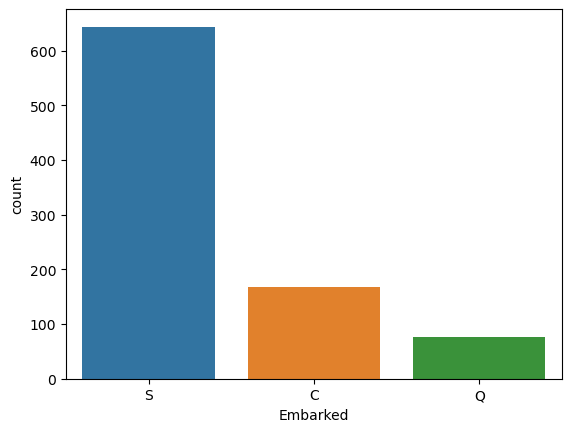

In [26]:
sns.countplot(x=df["Embarked"])

For the Titanic dataset, `sns.countplot(x=df["Embarked"])` will display the count of passengers  embarked from different ports (C = Cherbourg, Q = Queenstown, S = Southampton).


A count plot and a bar plot are similar in the sense that they are both used to visualise categorical data. A countplot counts the number of observations per category, while a barplot may sometimes estimates a summary statistic per category, such as the average.

Write your inferences here.

Moving on, numerical data can either be continuous or discrete. The following plots are typically used for analysing the distribution and spread of continuous variables.

### Kernel Density Plot

<Axes: ylabel='Density'>

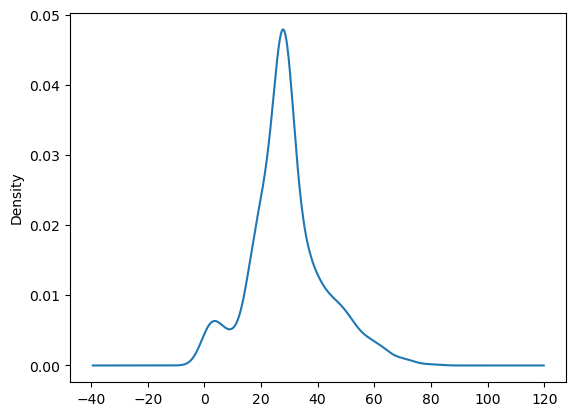

In [27]:
df['Age'].plot(kind='kde')

A KDE plot gives a smooth estimate of the **probability density function (PDF)** of the variable. It’s useful for understanding how the data is distributed in terms of where most values lie.

In this case, it shows the distribution of passenger's ages, helping identify age ranges where there are more passengers.

Write your inferences here.

In [28]:
df['SibSp'].describe()

count    889.000000
mean       0.524184
std        1.103705
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

### Histogram

It is used to see the bucket-wise distribution of a continuous variable.

In [29]:
sns.histplot?

Fare


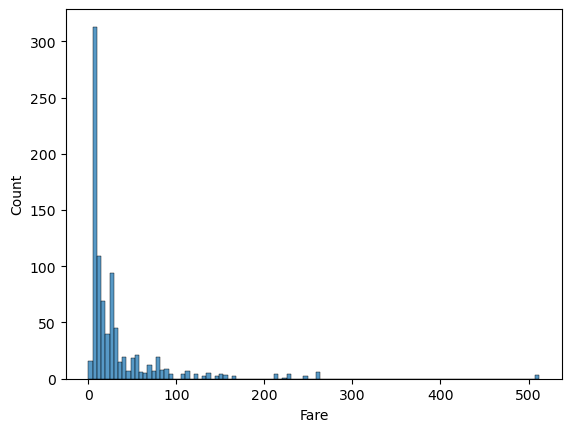

Age


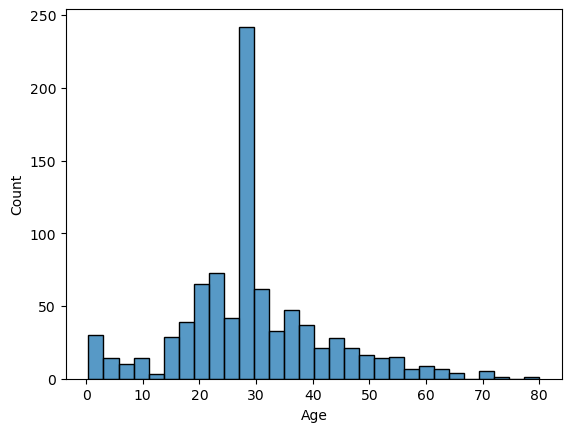

In [30]:
# Looping through each column in the continuous columns list (cont_cols)
for i in cont_cols:

    # Print the name of the current continuous column being processed
    print(i)

    # Plot a histogram for the current column using seaborn's histplot
    sns.histplot(df[i])

    # Display the plot after generating the histogram for the current column
    plt.show()

Fare


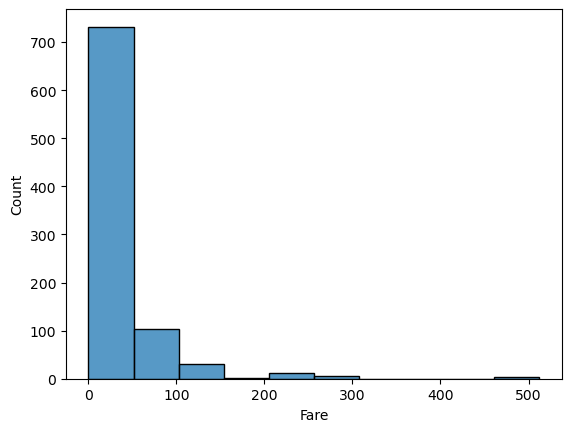

Age


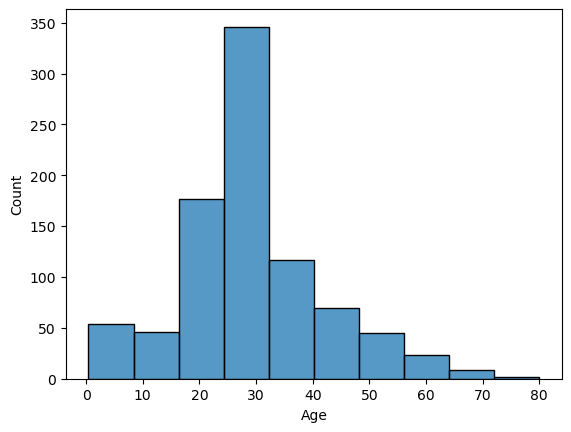

In [31]:
# Looping through each column in the continuous columns list (cont_cols)
for i in cont_cols:

    # Print the name of the current continuous column being processed
    print(i)

    # Plot a histogram for the current column using seaborn's histplot with bins 10
    sns.histplot(df[i],bins=10)

    # Display the plot after generating the histogram for the current column
    plt.show()

Write your inferences here.

### Boxplot

<Axes: >

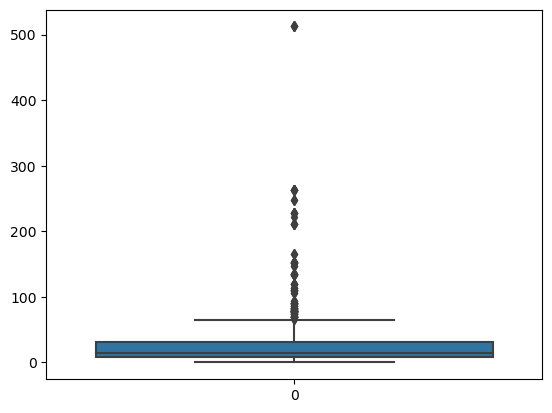

In [32]:
sns.boxplot(df["Fare"])


- It is used to see the quartile-wise distribution of a continuous variable.

- It is also used to see the outliers present in the data.

- Boxplots are also used to see the quartile-wise distribution of a continuous variable against categorical variables (e.g. distribution of sales across various categories).

Write your inferences here.

In [33]:
df["Fare"].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Scatterplot

<Axes: ylabel='Age'>

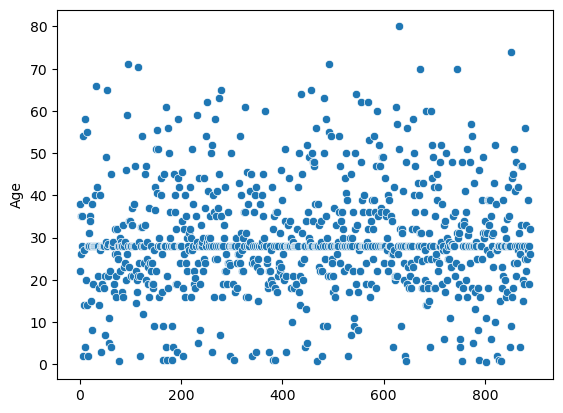

In [34]:
sns.scatterplot(df["Age"])

For the Titanic dataset, `sns.scatterplot(x=df["Age"])` will display the distribution of passengers across different age classes. Scatter plot is generally used for depicting relation between two numerical variables but it can also be used to plot a single numerical variable. It is also known as jittered dot plot.

The `x-axis` represents the index of the DataFrame, which is essentially the row number or the order of the passengers.
The `y-axis` represents the Age of each passenger, giving an overview of how passenger ages are distributed.

Write your inferences here.